### Import modules

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

### Read the image files

We first read the image we want to align and the corresponding reference (template) image 

In [2]:
# Read the image files. 
img1_color= cv2.imread('images/align.png') # Image to be aligned. 
img2_color = cv2.imread('images/ref.png') # Reference image. 


In [3]:

# Convert to grayscale. 
img1 = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY) 
img2 = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY) 
height, width = img2.shape 

### Detect Features

Even though only 4 features are enough to define the homography, we still control the number of features using the max_features parameter

In [4]:
# Create ORB detector with 5000 features. 
max_features = 5000
sift = cv2.xfeatures2d.SIFT_create()

# Find keypoints and descriptors. 
# The first arg is the image, second arg is the mask 
# (which is not reqiured in this case). 
kp1, d1 = sift.detectAndCompute(img1, None) 
kp2, d2 = sift.detectAndCompute(img2, None) 

### Match features

In [17]:
# BFMatcher with default params 
matcher = cv2.BFMatcher() 

# Match the two sets of descriptors. 
matches = matcher.knnMatch(d1, d2, k=2) 
no_of_matches = len(matches)

# Apply ratio test
lowe_ratio = 0.75
good = []
good_list = []
for m,n in matches:
    if m.distance < lowe_ratio *n.distance:
        good.append(m)
        good_list.append([m])
        

        
#Draw top matches [# cv2.drawMatchesKnn expects list of lists as matches.]
imMatches = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good_list, None, flags=2)
cv2.imwrite("matches_sift.jpg", imMatches)

0.07662835249042145 % similarity
Match not Found
0.1532567049808429 % similarity
Match not Found
0.22988505747126436 % similarity
Match not Found
0.3065134099616858 % similarity
Match not Found
0.3831417624521073 % similarity
Match not Found
0.45977011494252873 % similarity
Match not Found
0.5363984674329502 % similarity
Match not Found
0.6130268199233716 % similarity
Match not Found
0.6896551724137931 % similarity
Match not Found
0.7662835249042146 % similarity
Match not Found
0.842911877394636 % similarity
Match not Found
0.9195402298850575 % similarity
Match not Found
0.9961685823754789 % similarity
Match not Found
1.0727969348659003 % similarity
Match not Found
1.1494252873563218 % similarity
Match not Found
1.2260536398467432 % similarity
Match not Found
1.3026819923371646 % similarity
Match not Found
1.3793103448275863 % similarity
Match not Found
1.4559386973180077 % similarity
Match not Found
1.5325670498084292 % similarity
Match not Found
1.6091954022988506 % similarity
Match 

True

Notice, we have many incorrect matches and therefore we will need to use a robust method to calculate homography in the next step.

### Find the homography

In [7]:
# Extract location of good matches

    
p1= np.float32(
    [kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)    
    
p2 = np.float32(
    [kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)  



    
# Find the homography matrix. 
homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC, 5.0) 

In [8]:
print (np.array(good).shape)

(483,)


### Warping image

In [9]:
# Use this matrix to transform the 
# colored image wrt the reference image. 
transformed_img = cv2.warpPerspective(img1_color, 
					homography, (width, height)) 

# Save the output. 
cv2.imwrite('output_sift.jpg', transformed_img)

print("Estimated homography : \n",  homography)
  

Estimated homography : 
 [[ 1.45237773e+00  2.88317964e-02 -6.73201185e+02]
 [-1.77924947e-01  1.57918457e+00 -3.15613408e+02]
 [-2.84132539e-05 -1.64985826e-05  1.00000000e+00]]


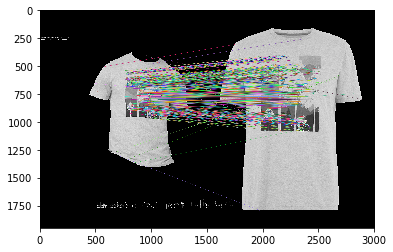

using SIFT with lowe_ratio 0.75 there are 483 good matches


In [14]:
msg1 = 'using %s with lowe_ratio %.2f' % ("SIFT", lowe_ratio)
msg2 = 'there are %d good matches' % (len(good))


plt.imshow(imMatches),plt.show()

print (msg1 + ' '+ msg2)